<a href="https://colab.research.google.com/github/MikeDeecode/Bank-customer-churn-predictiom/blob/master/Data%20quality%20assessment%20and%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA QUALITY ASSESSMENT AND EXPLORATORY DATA ANALYSIS**

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

print("Setup complete")

Setup complete


In [2]:
customer_data = pd.read_csv('/content/Bank customers.csv')

print("Upload successful")

Upload successful


In [3]:
customer_data.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns 

Note that coliumn description will be provided in the readme file 

In [4]:
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* The daraset contains no missing value

In [20]:
customer_data['CustomerId'].duplicated().sum()

0

In [22]:
customer_data['Surname'].duplicated().sum()

7068

In [11]:
ages = [18, 39, 69, 100]
groups = ["Young Adult", "Adult", "Senior"]

customer_data['Age Group'] = pd.cut(customer_data['Age'], bins = ages, labels = groups, include_lowest = True)

In [15]:
customer_data['HasCrCard'].replace(to_replace = 0, value = "No", inplace = True)
customer_data['HasCrCard'].replace(to_replace = 1, value = "Yes", inplace = True)

In [16]:
customer_data['IsActiveMember'].replace(to_replace = 0, value = "No", inplace = True)
customer_data['IsActiveMember'].replace(to_replace = 1, value = "Yes", inplace = True)

In [17]:
customer_data['Exited'].replace(to_replace = 0, value = "Existing customer", inplace = True)
customer_data['Exited'].replace(to_replace = 1, value = "Exited", inplace = True)

In [18]:
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Exited,Adult
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,Existing customer,Adult
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Exited,Adult
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,Existing customer,Young Adult
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,Existing customer,Adult


#**Credit Score**

In [23]:
customer_data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

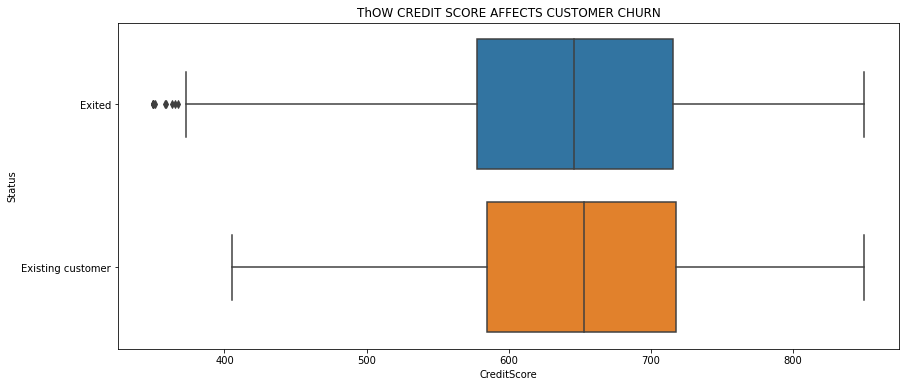

In [25]:
plt.figure(figsize = (14, 6))
sns.boxplot('CreditScore', 'Exited', data = customer_data)
plt.title("ThOW CREDIT SCORE AFFECTS CUSTOMER CHURN")
plt.ylabel("Status")
plt.show()

##**Geography**

In [26]:
customer_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

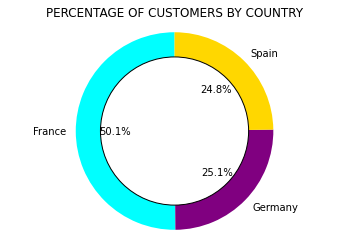

In [32]:
customer_count = [5014, 2509, 2477]
location = ["France", "Germany", "Spain"]
colour = ['cyan', 'purple', 'gold']

plt.pie(customer_count, labels = location, colors = colour, autopct = '%1.1f%%', startangle = 90)

donut = plt.Circle((0,0), 0.75, color = 'black', fc = 'white')
figure = plt.gcf()
figure.gca().add_artist(donut)

plt.title("PERCENTAGE OF CUSTOMERS BY COUNTRY")
plt.axis('equal')
plt.show()